## Data Analysis

In [54]:
import pandas as pd
import numpy as np

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
train = pd.read_csv('titanic_train.csv')

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

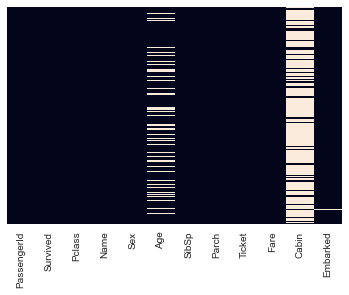

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [59]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

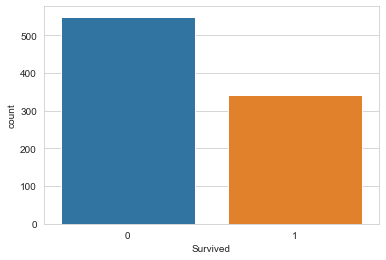

In [60]:
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

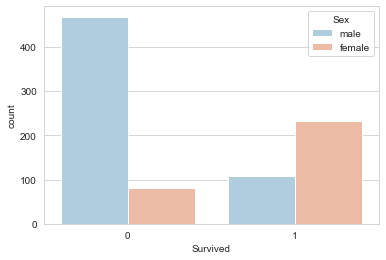

In [61]:
sns.countplot(x='Survived', hue='Sex', data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

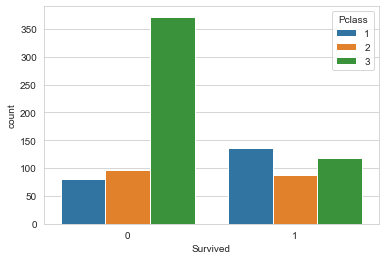

In [62]:
sns.countplot(x='Survived', hue='Pclass', data=train)

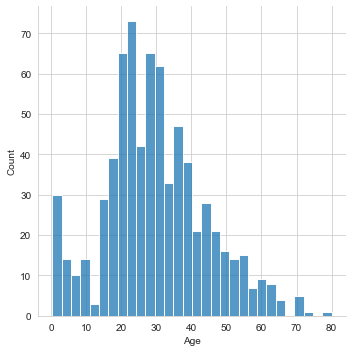

In [63]:
sns.displot(train['Age'].dropna(), kde=False, bins=30)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

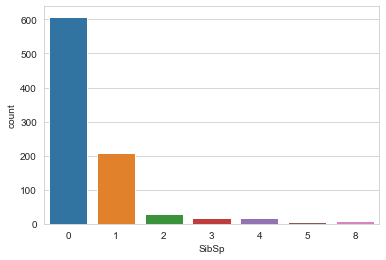

In [65]:
sns.countplot(x="SibSp", data=train)

<AxesSubplot:>

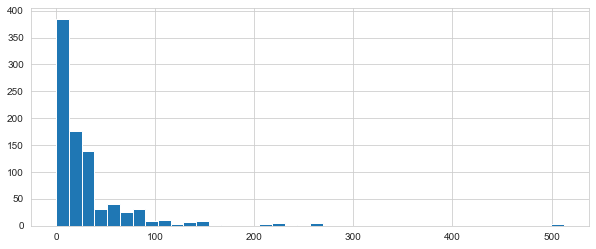

In [66]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [67]:
import cufflinks as cf

In [68]:
cf.go_offline()

In [69]:
#train['Fare'].iplot(kind='hist', bins=30)

## Cleaning Data

### Dealing with missing value

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

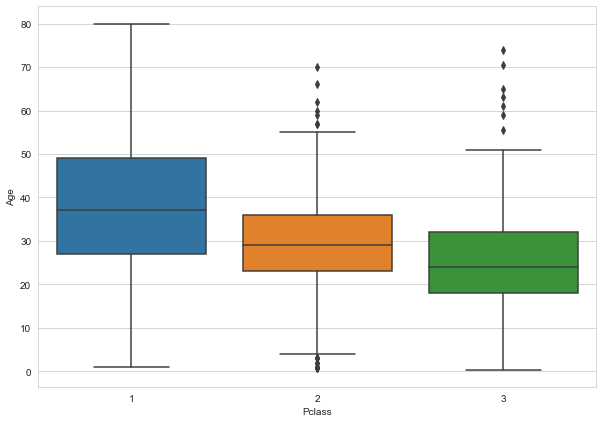

In [70]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

First class passengers tend to be a bit older than passengers in third class
-> Use these average age values in order to impute the average based off the passengers class

In [71]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [72]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

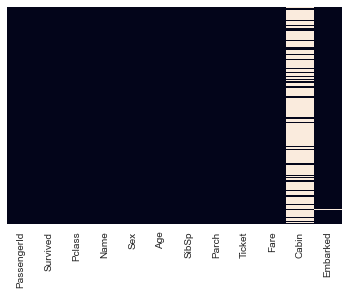

In [73]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [74]:
train.drop('Cabin', axis=1, inplace=True)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

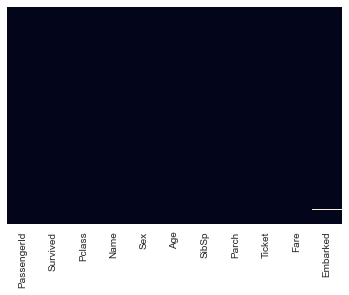

In [76]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [77]:
train.dropna(inplace=True)

<AxesSubplot:>

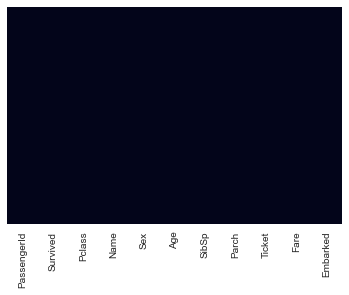

In [78]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

### Dealing with categorical features

In [79]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [80]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [81]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [82]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [83]:
train = pd.concat([train,sex,embark], axis = 1)

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [85]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

We drop 'Sex' and "Embarked' since we encoded into the numerical column and 'Name' and 'Ticket' because hard to do feature engineering and does not have some information in it

In [86]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [87]:
train.drop('PassengerId',axis=1,inplace=True)

Drop 'PassengerId' too because that column is just same as the index of our data

In [88]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Train and use the model to predict the class of the passanger survival

In [89]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [93]:
from sklearn.linear_model import LogisticRegression

In [95]:
logmodel = LogisticRegression()

In [96]:
logmodel.fit(X_train,y_train)

/Users/seoeunhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [97]:
predictions = logmodel.predict(X_test)

In [99]:
from sklearn.metrics import classification_report

## Evaluate the Model

In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]])